**지도학습(Supervised Learning) : 정답을 알려주며 학습하는 것.**

고양이 사진을 주고(input data), 이 사진은 고양이(정답지 - label data)야.  
사자 사진을 주고, 이 사진은 사자야. 라고 알려주는 학습 방식  
회귀 : 어떤 데이터들의 특징(feature)을 토대로 값을 예측  
분류 : 이진 분류, 다중 분류  
K-최근접 이웃(k-Nearest Neigbors)  
선형회귀(Linear Regression)  
로지스틱 회귀(Logistic Regression)  
서포트 벡터 머신(SVM, Support Vector Machine)  
결정 트리(Decision Tree)와 랜덤 포레스트(Random Forest)  
신경망 (Neural Network)  

**비지도학습(Unsupervised Learning) : 정답을 알려주지 않고(label 없음), 비슷한 데이터들을 군집화**
- 군집화, 동물이 '무엇' 이라고 기계가 정의는 할 수 없지만 비슷한 단위로 군집화 

**강화학습(Reinforcement Learning)**
- 상과 벌이라는 보상(reward)을 주며 상을 최대화 하고 벌을 최소화 하도록 강화 학습하는 방식 

**회귀선 : 주어진 데이터를 대표하는 하나의 직선**

**회귀식 : 회귀선을 함수로 표현한 것**

**단순선형 회귀분석 : y = wx + b인 회귀식에서 x가 1개**

**잔차 : 관측값의 y와 예측값의 y간의**

**최소제곱법 : 잔차의 제곱의 합이 최소가 되도록 회귀계수를 구함**

# 회귀
* 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
* 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
* 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_excel('auto-mpg.xlsx',engine='openpyxl')
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [115]:
#분석에 활용할 열(속성)을 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [116]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cylinders   398 non-null    int64  
 2   horsepower  398 non-null    object 
 3   weight      398 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [117]:
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [118]:
# horsepower 열의 자료형 변경(문자->숫자)
import numpy as np
ndf.horsepower.replace('?',np.nan,inplace=True)
ndf.dropna(subset=['horsepower'],axis=0,inplace=True) # 누락 데이터 행 ㅏㄱ제
ndf.horsepower.isnull().sum()

0

In [119]:
ndf.horsepower = ndf.horsepower.astype('float')
ndf.horsepower.dtypes

dtype('float64')

In [120]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [121]:
# 저장
ndf.to_pickle('auto-mpg.pkl')
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


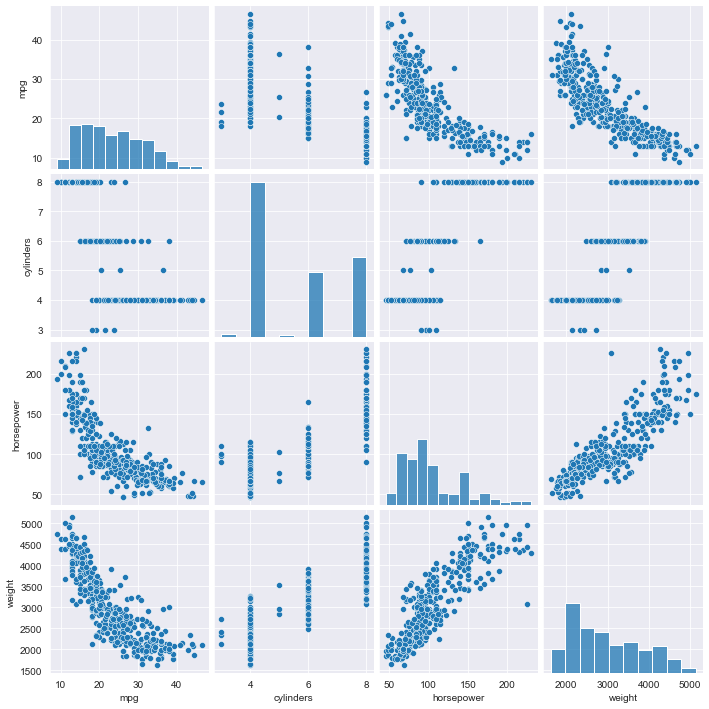

In [122]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()

In [123]:
#속성(변수) 선택
X = ndf[['weight']] # 독립변수 X
y = ndf[['mpg']] # 종속변수 Y

# train data 와 test data로 구분(7:3) 비율
from sklearn.model_selection import train_test_split

#이 함수를 이용해서 트레인 셋을 얻는다.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=11)
# 독립변수, 종속변수, 테스트 값 비율, 랜덤 추출 값

print('train data 개수:', len(X_train))
print('test data 개수:', len(X_test))

train data 개수: 274
test data 개수: 118


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

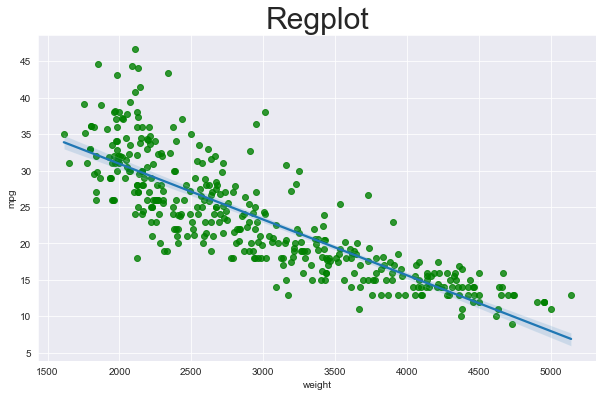

In [124]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot', fontsize=30)
sns.regplot(ax=axes, x='weight', y='mpg', data=ndf, scatter_kws={'color':'green'})

In [125]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression # 알고리즘(단순선형회귀) 임포트

# 단순회귀분석 모형 객체 생성 (Simple Linear Regression) - 상황에 따라 알맞는 모델을 사용해야 한다.
lr = LinearRegression()
# train data를 가지고 모형 학습
lr.fit(X_train, y_train) # 학습용 데이터로 fit 시킨다(학습시킨다). 독립변수와 종속변수를 이용하여 학습
# 학습을 해서 오차를 최소로 하는 y=ax+b 에서 a, b를 찾아준다.
# 학습된 데이터는 lr에 저장

y_preds = lr.predict(X_test)

In [126]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
# 결정계수 값이 클수록 모형의 예측 성능이 좋다고 판단
# 회귀모델에 대한 평가 : MSE, RMSE, R_Square
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, y_preds)

print(f'MSE:{round(mse,4)}, RMSE:{round(rmse,4)}, R2_Score:{round(r2_score,4)}')

MSE:22.169, RMSE:4.7084, R2_Score:0.6411


In [127]:
r_square = lr.score(X_test, y_test) # score를 통해 점수를 계산해서 정확도 검증(검증용 데이터를 넣어서 검증)
print(r_square) # 이 모델에서는 r스퀘어를 사용한다. (설명력이 얼마나 있는지 판단.- 비교적 간단하기 때문에 r_square 사용.)
# 분산의 크기를 가지고 평가.

0.6410608728212728


In [128]:
# 회귀식의 기울기
print('기울기 a:', lr.coef_)

# 회귀식의 y절편
print('y절편 b:', lr.intercept_)

기울기 a: [[-0.00762163]]
y절편 b: [45.9712177]


<AxesSubplot:ylabel='Density'>

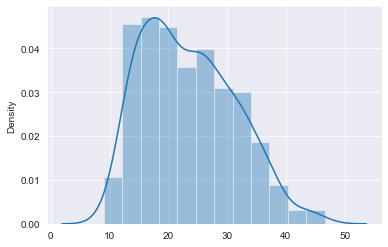

In [129]:
sns.distplot(y)  # y값에 대한 히스토그램 (실제 y값) y=ndf['mpg']

<AxesSubplot:ylabel='Density'>

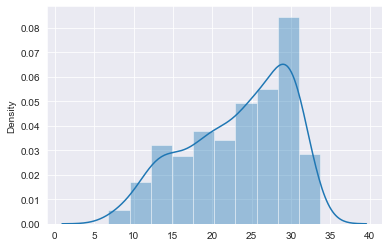

In [130]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교

y_hat = lr.predict(X) # lr을 이용해서 X를 대입했을 때 예측
sns.distplot(y_hat)

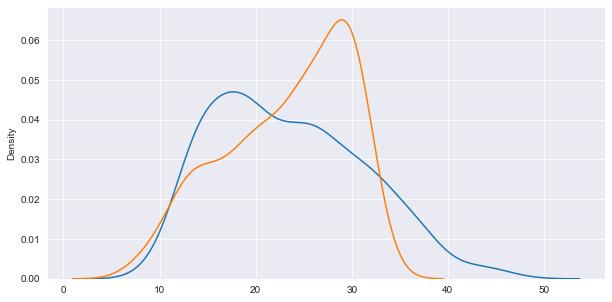

In [131]:
# 실제 값은 왼쪽으로 편향, 예측 값은 오른쪽으로 편향되는 경향을 보임 -> 모형의 오차를 줄일 필요가 있음
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')

## 다항 회귀분석
* 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
* 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
* 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관<br>
https://chana.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D5-%EB%8B%A4%ED%95%AD-%ED%9A%8C%EA%B7%80

In [132]:
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [133]:
# 다항회귀분석 모형 - sklearn 사용
# sklearn 라이브러리에서 필요한 모듈 가져오기

from sklearn.linear_model import LinearRegression #선형 회귀분석
from sklearn.preprocessing import PolynomialFeatures #다항식 변환


# 다항식 변환
poly = PolynomialFeatures(degree=2) #2차항 적용, 객체 생성
X_train_poly = poly.fit_transform(X_train) #X_train 데이터를 2차항으로 변형(단항 -> 다항으로 바꾸는 기능)

print('원 데이터:', X_train.shape)
print('2차항 변환 데이터:', X_train_poly.shape)
print(X_train_poly[:5])

원 데이터: (274, 1)
2차항 변환 데이터: (274, 3)
[[1.0000000e+00 2.1200000e+03 4.4944000e+06]
 [1.0000000e+00 4.4990000e+03 2.0241001e+07]
 [1.0000000e+00 1.8450000e+03 3.4040250e+06]
 [1.0000000e+00 2.0450000e+03 4.1820250e+06]
 [1.0000000e+00 1.9850000e+03 3.9402250e+06]]


In [134]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train) #다항으로 바꿔준 데이터로 학습을 시킨다.

# 다항으로 바꾼 독립변수들과, 학습한 y값으로 학습시킨다. (선형회귀법을 사용)
# pr에 학습된 모델이 적용된 상태
 

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
# 설계한 모형의 오차가 작다면 R-square가 커지고, 설계한 모형의 오차가 크다면 R-square

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test) # 학습된 모델을 가지고 스코어링 할 수 있다.(설명력 점수 평가)

print(r_square) # 3% 값이 개선된 것을 확인할 수 있다.

0.6368479947378759


In [135]:
# 회귀식의 기울기
print('기울기 a:', lr.coef_)

# 회귀식의 y절편
print('y절편 b:', lr.intercept_)

기울기 a: [[-0.00762163]]
y절편 b: [45.9712177]


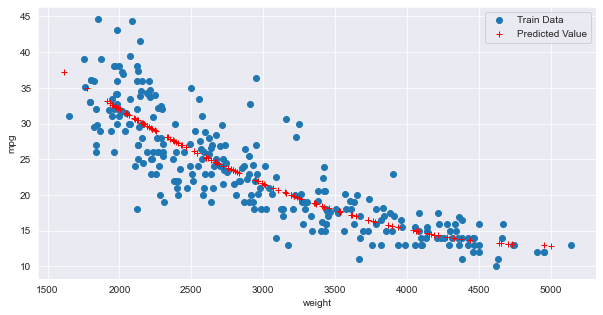

In [136]:
# train data의 산점도와 test data로 예측한

y_hat_test = pr.predict(X_test_poly) # 다항으로 바꾼 검증용 데이터를 가지고 예측한 값을 y_hat_test에 저장

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1) # 하나의 그래프를 만들어준다.
ax.plot(X_train.values[:,:], y_train.values[:,:], 'o', label='Train Data') # 데이터 분포 # 학습용 데이터를 그래프로 그려준다.
ax.plot(X_test.values[:,:], y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

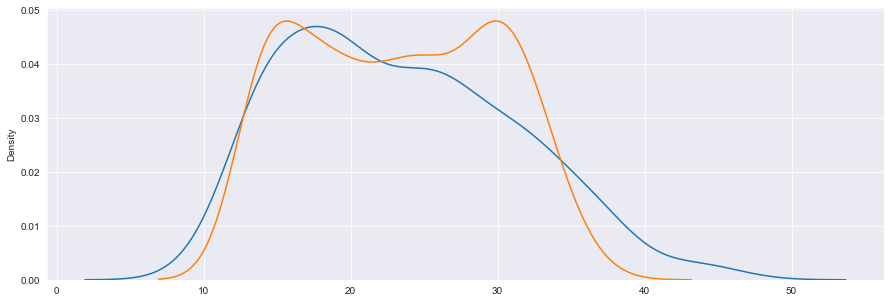

In [137]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
# 단순 회귀분석 결과와 비교하면 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소한 것을 확인

X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(15,5))
ax1 = sns.distplot(y, hist=False, label='y') # 히스토그램을 보여줄지 말지 선택(True, False)
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()

## 다중 회귀분석
* 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
* 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [164]:
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [165]:
X = ndf.drop('mpg',axis=1) # 독립변수 
y = ndf['mpg'] # 종속변수

# train data 와 test data로 구분(7:3) 비율
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print(X_train.shape,X_test.shape)

(274, 3) (118, 3)


In [166]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square = lr.score(X_test,y_test)
print(f'MSE:{round(mse,4)}, RMSE:{round(rmse,4)}, R_Squre:{round(r_square,4)}')

MSE:17.3301, RMSE:4.1629, R_Squre:0.6939


In [161]:
# 회귀식의 기울기
print('기울기 a:', lr.coef_)

# 회귀식의 y절편
print('y절편 b:', lr.intercept_)

기울기 a: [-0.60691288 -0.03714088 -0.00522268]
y절편 b: 46.41435126963405


## 경사하강법 Gradient Descent

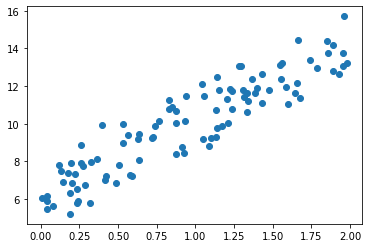

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6을 근사할거임
X = 2 * np.random.rand(100,1)# rand => 0 ~ 1 사이의 균일 분포에서 난수 matrix array생성 ( m * n 크기)
y = 6 + 4 * X + np.random.randn(100,1) # randn => 가우시안 표준 정규 분포에서 난수 matrix array생성 ( m * n 크기)

plt.scatter(X,y)
plt.show()
# X, y 모두 array로 1개의 column이라고 생각하면 될듯

In [10]:
# 비용 함수 정의하기 ( RSS )
# 1 / N 시그마 1부터 N 까지 (실제값 - 예측값) ^2
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [11]:
# 경사하강법을 구현
# w1, w0을 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트 ( 편미분 적용 )

# w1, w0을 업데이트할 w1_update, w0_update 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화 -> 미리 만드는 이유??
    w1_update = np.zeros_like(w1) # n * 1
    w0_update = np.zeros_like(w0) # n * 1
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0 # 예측 값 n*1행렬 dot 1*n 행렬 -> n * n 행렬 ( X값이 1 ~ n, 각각의 가중치가 1 ~ n)
    diff = y - y_pred # n*1행렬 - n*n행렬?? -> 자동으로 n*1행렬을 n*n 행렬로 확장해서 -를 계산해준다!! ( n * n 행렬)
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) # 1 * n 행렬 dot n * n 행렬
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff)) # 1 * n 행렬 dot n * n 행렬 -> 1 * n 행렬 
    
    return w1_update, w0_update # 1 * n 행렬 

In [12]:
# n*1행렬 - n*n행렬? 예시로 확인
y[0]

array([9.22535819])

In [13]:
np.dot(X,X.T)[0]

array([1.20478505, 1.57002233, 1.32321872, 1.196157  , 0.9300299 ,
       1.41790165, 0.96061508, 1.95766826, 2.11548454, 0.84175153,
       1.73803757, 1.1610587 , 1.2470021 , 2.03191974, 0.15594219,
       0.19127095, 0.04438452, 1.82781206, 1.70825173, 1.90989766,
       2.14831585, 1.75435605, 1.01306442, 1.71345981, 0.25964241,
       1.40478919, 0.31469688, 2.07378823, 1.14558962, 0.91028829,
       0.58076677, 1.69963962, 1.00136585, 1.24785691, 0.04124838,
       1.35586681, 1.34370559, 1.35432683, 2.07176676, 1.49676875,
       0.78921116, 0.95939615, 1.53147768, 0.13221021, 1.46372231,
       1.47222048, 0.46184316, 0.28302597, 0.69244535, 0.79843753,
       1.25172675, 0.96284173, 2.16973164, 0.22401428, 0.45853754,
       0.35411537, 1.43373867, 0.55603941, 1.0236706 , 0.53657626,
       0.34897862, 0.24230147, 1.44081017, 0.30334668, 0.43154822,
       0.80944541, 1.80228868, 0.21316197, 1.83950192, 0.21096042,
       2.14357656, 1.02880843, 2.1442387 , 1.32778956, 1.62287

In [14]:
(y - np.dot(X,X.T))[0]

array([8.02057314, 7.65533586, 7.90213947, 8.0292012 , 8.29532829,
       7.80745655, 8.26474311, 7.26768993, 7.10987365, 8.38360666,
       7.48732062, 8.06429949, 7.97835609, 7.19343845, 9.069416  ,
       9.03408725, 9.18097367, 7.39754613, 7.51710646, 7.31546053,
       7.07704235, 7.47100214, 8.21229377, 7.51189838, 8.96571578,
       7.820569  , 8.91066131, 7.15156996, 8.07976857, 8.3150699 ,
       8.64459142, 7.52571857, 8.22399234, 7.97750128, 9.18410981,
       7.86949139, 7.8816526 , 7.87103136, 7.15359143, 7.72858944,
       8.43614703, 8.26596204, 7.69388051, 9.09314798, 7.76163588,
       7.75313771, 8.76351503, 8.94233222, 8.53291284, 8.42692066,
       7.97363144, 8.26251646, 7.05562655, 9.00134391, 8.76682065,
       8.87124282, 7.79161952, 8.66931878, 8.20168759, 8.68878193,
       8.87637957, 8.98305672, 7.78454802, 8.92201151, 8.79380997,
       8.41591278, 7.42306951, 9.01219623, 7.38585627, 9.01439777,
       7.08178163, 8.19654976, 7.08111949, 7.89756863, 7.60248

In [15]:
# 경사 하강 방식으로 업데이트를 반복적으로 수행!!

def gradient_descent_steps(X, y, iters = 10000):
    # w0과 w1를 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()를 호출해 업데이트
    for _ in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01) # w0, w1이 1*1행렬이므로 1개의 값만 출력된다
        w1 -= w1_update
        w0 -= w0_update
        
    return w1, w0 

In [16]:
w1, w0 = gradient_descent_steps(X, y, iters = 1000)

print("w1 : ", round(w1[0,0],3), ", w0 : ", round(w0[0,0],3))

y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1 :  4.022 , w0 :  6.162
Gradient Descent Total Cost:0.9935


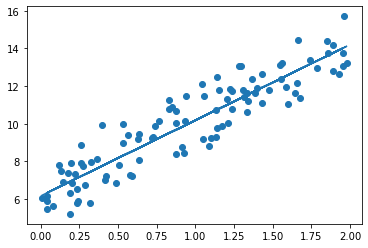

In [17]:
# 회귀선 그리기
plt.scatter(X,y)
plt.plot(X, y_pred)
plt.show()

위의 방식같은 일반적인 경사하강법은 너무 오래걸리기 때문에 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다.

In [18]:
# (미니 배치) 확률적 경사 하강법

def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample 값으로 저장
        stochastic_random_index = np.random.permutation(X.shape[0]) # permutation = array를 복사해서 셔플 ( Shuffle은 해당 array)
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]] # 랜덤으로 섞어서 batch_size만큼의 행을 위에서부터 선택
        
        # sample 사이즈로 X, y선택
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 -= w1_update
        w0 -= w0_update
        
    return w1, w0

In [19]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)

print("w1 : ", round(w1[0,0],3), ", w0 : ", round(w0[0,0],3))

y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1 :  4.028 , w0 :  6.156
Gradient Descent Total Cost:0.9937


지금까지는 단순 선형 회귀에서 경사 하강법을 적용하였는데 우리가 진짜 쓰게 될 피처가 여러개인 경우에는 어떻게 회귀 계수를 도출할 수 있을까?

피처가 M ( X1,X2....X100 ) 개일 경우에는 회귀 계수도 M + 1개로 도출 되고 Y = w0 + w1*X1 ...w100*X100으로 예측 회귀식을 만들 수 있다. 또한 이 때의 예측 행렬 y_pred는 굳이 개별적으로 X의 개별 원소와 w1의 값을 곱하지 않고 데이터의 개수가 N이고 피처가 M개인 입력행렬 X_mat과 회귀 계수 w1,w2...w100을 배열로 표기한 W와의 행렬곱으로 구할 수 있다.

y_pred = np.dot(X, w1.T) + w0 -> np.dot(X_mat, W^T) + w0

이 때 w0을 W배열에 포함시키기 위해 X_mat의 맨 처음 열에 모든 데이터의 값이 1인 피처를 추가해주면 Yhat = X_mat * W^T로 도출할 수 있다.



## 회귀 평가 지표
* MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
* MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
* RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
* R square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.

https://blog.naver.com/PostView.nhn?blogId=bya135&logNo=222228358219&parentCategoryNo=&categoryNo=24&viewDate=&isShowPopularPosts=true&from=search<br>
https://libertegrace.tistory.com/entry/Evaluation2

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [2]:
# 과제 boston 데이터셋 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bdf = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bdf['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bdf.shape)
print(boston.keys())
bdf.head()

Boston 데이타셋 크기 : (506, 14)
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

* 각 컬럼별로 주택가격에 미치는 영향도를 조사

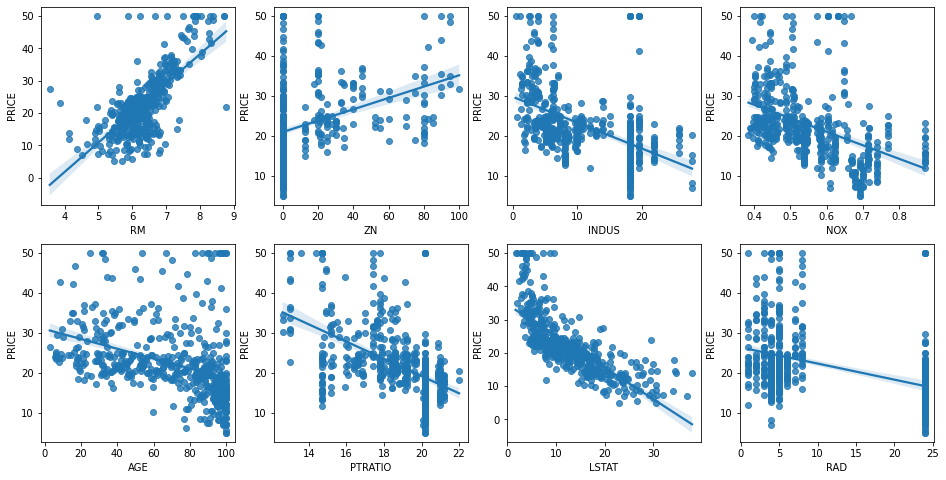

In [4]:
# regplot() : X, Y 산점도와 함께 선형 회귀 직선을 그려준다. 
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bdf , ax=axs[row][col])

fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

**RM(방 개수)과 LSTAT(하위 계층의 비율)의 PRICE영향도가 두드러지게 나타난다**

방의 크기가 클수록 가격이 증가, 하위 계층의 비율이 적을 수록 가격이 증가

**학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bdf['PRICE']
X_data = bdf.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [6]:
# LinearRegression으로 생성한 주택가격 모델의 절편과 회귀 계수
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [7]:
# coef_ 속성이 회귀 계수 값만 가지고 있기 때문에 회귀 계수 값으로 다시 매핑
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크며, NOX피처의 회귀 계수는 - 값이 너무 커보인다.

In [8]:
from sklearn.model_selection import cross_val_score

y_target = bdf['PRICE']
X_data = bdf.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
# neg_mse_scores은 음수값이 반환
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
